In [138]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.preprocessing as skp
import sklearn.cluster as skc
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression,RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import f

In [107]:
# Read the CSV file 'Country-data.csv' into a DataFrame
# The DataFrame will contain the data from the CSV file
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
#Check dtypes and non null values in your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
#check statistical values of the data
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


---
---

In [5]:
#check if any column contains null value
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df[df.duplicated(keep=False)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


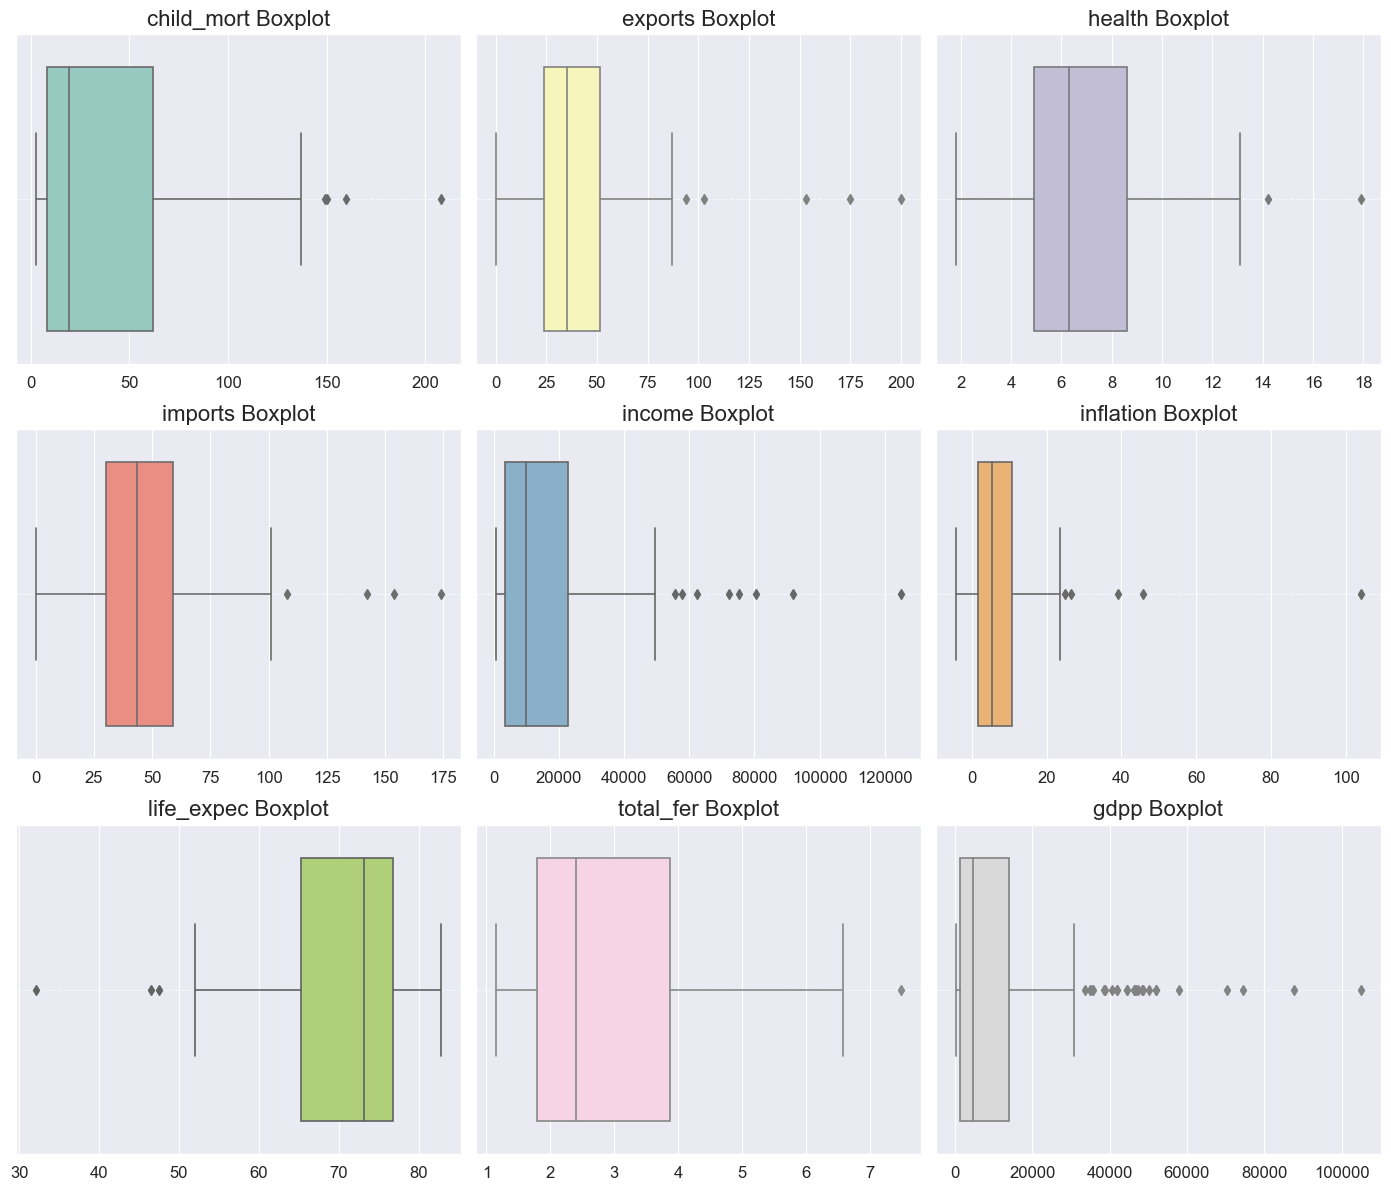

In [146]:
# Set the figure size
plt.figure(figsize=(14, 12))

# Define a custom color palette
custom_palette = sns.color_palette("Set3", n_colors=len(df.describe().columns))

# Iterate over each column in the DataFrame
for i, j in enumerate(df.describe().columns):
    # Create subplots for each column
    plt.subplot(3, 3, i+1)
    
    # Create a boxplot for the current column
    sns.boxplot(x=df[j], color=custom_palette[i])
    plt.title('{} Boxplot'.format(j), fontsize=16)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

plt.savefig('box.png')
plt.show()


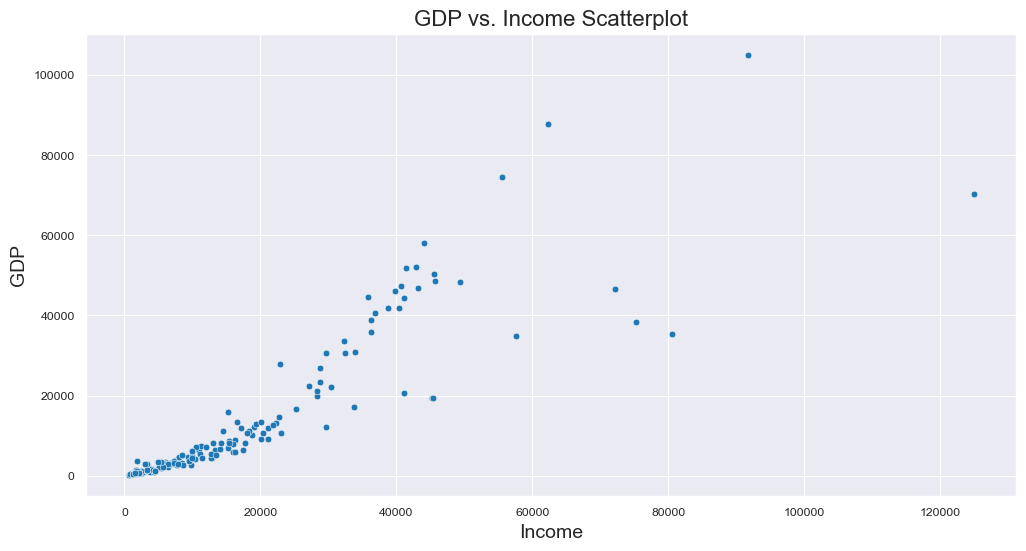

In [149]:
# Update the default font size for all plots
plt.rcParams.update({'font.size': 14})

# Define a color palette for the plot
palette = sns.color_palette("husl", 8)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a scatter plot of GDP vs. Income
sns.scatterplot(x=df.income, y=df.gdpp, ax=ax, palette=palette)

# Set the title and axis labels
ax.set_title('GDP vs. Income Scatterplot', fontsize=16)
ax.set_xlabel('Income', fontsize=14)
ax.set_ylabel('GDP', fontsize=14)

# Save the plot as a PNG file with tight layout
plt.savefig('scatter.png', bbox_inches='tight')

# Display the plot
plt.show()

In [10]:
print('Correlation between ggdp and income is : {}'.format(round(df[['income','gdpp']].corr() ,3)))

Correlation between ggdp and income is :         income   gdpp
income   1.000  0.896
gdpp     0.896  1.000


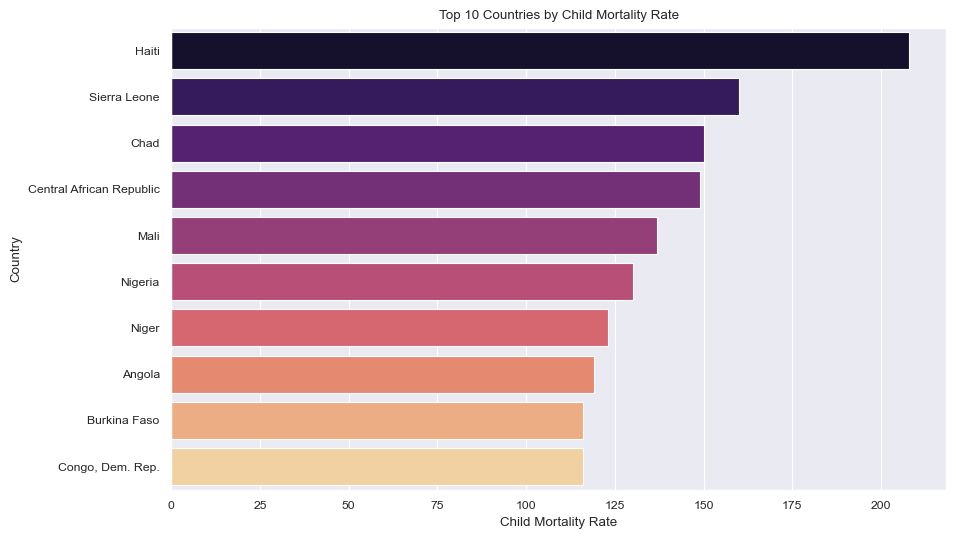

In [150]:
# Select the top 10 countries with the highest child mortality rates
top_10_child_mort = df[['country', 'child_mort']].sort_values(by='child_mort', ascending=False).head(10)

plt.figure(figsize=(10, 6))
# Create a bar plot showing the child mortality rate for each country
sns.barplot(x='child_mort', y='country', data=top_10_child_mort, palette='magma')
plt.xlabel('Child Mortality Rate')
plt.ylabel('Country')
plt.title('Top 10 Countries by Child Mortality Rate')
plt.savefig('chil_mort.png', bbox_inches='tight')

plt.show()

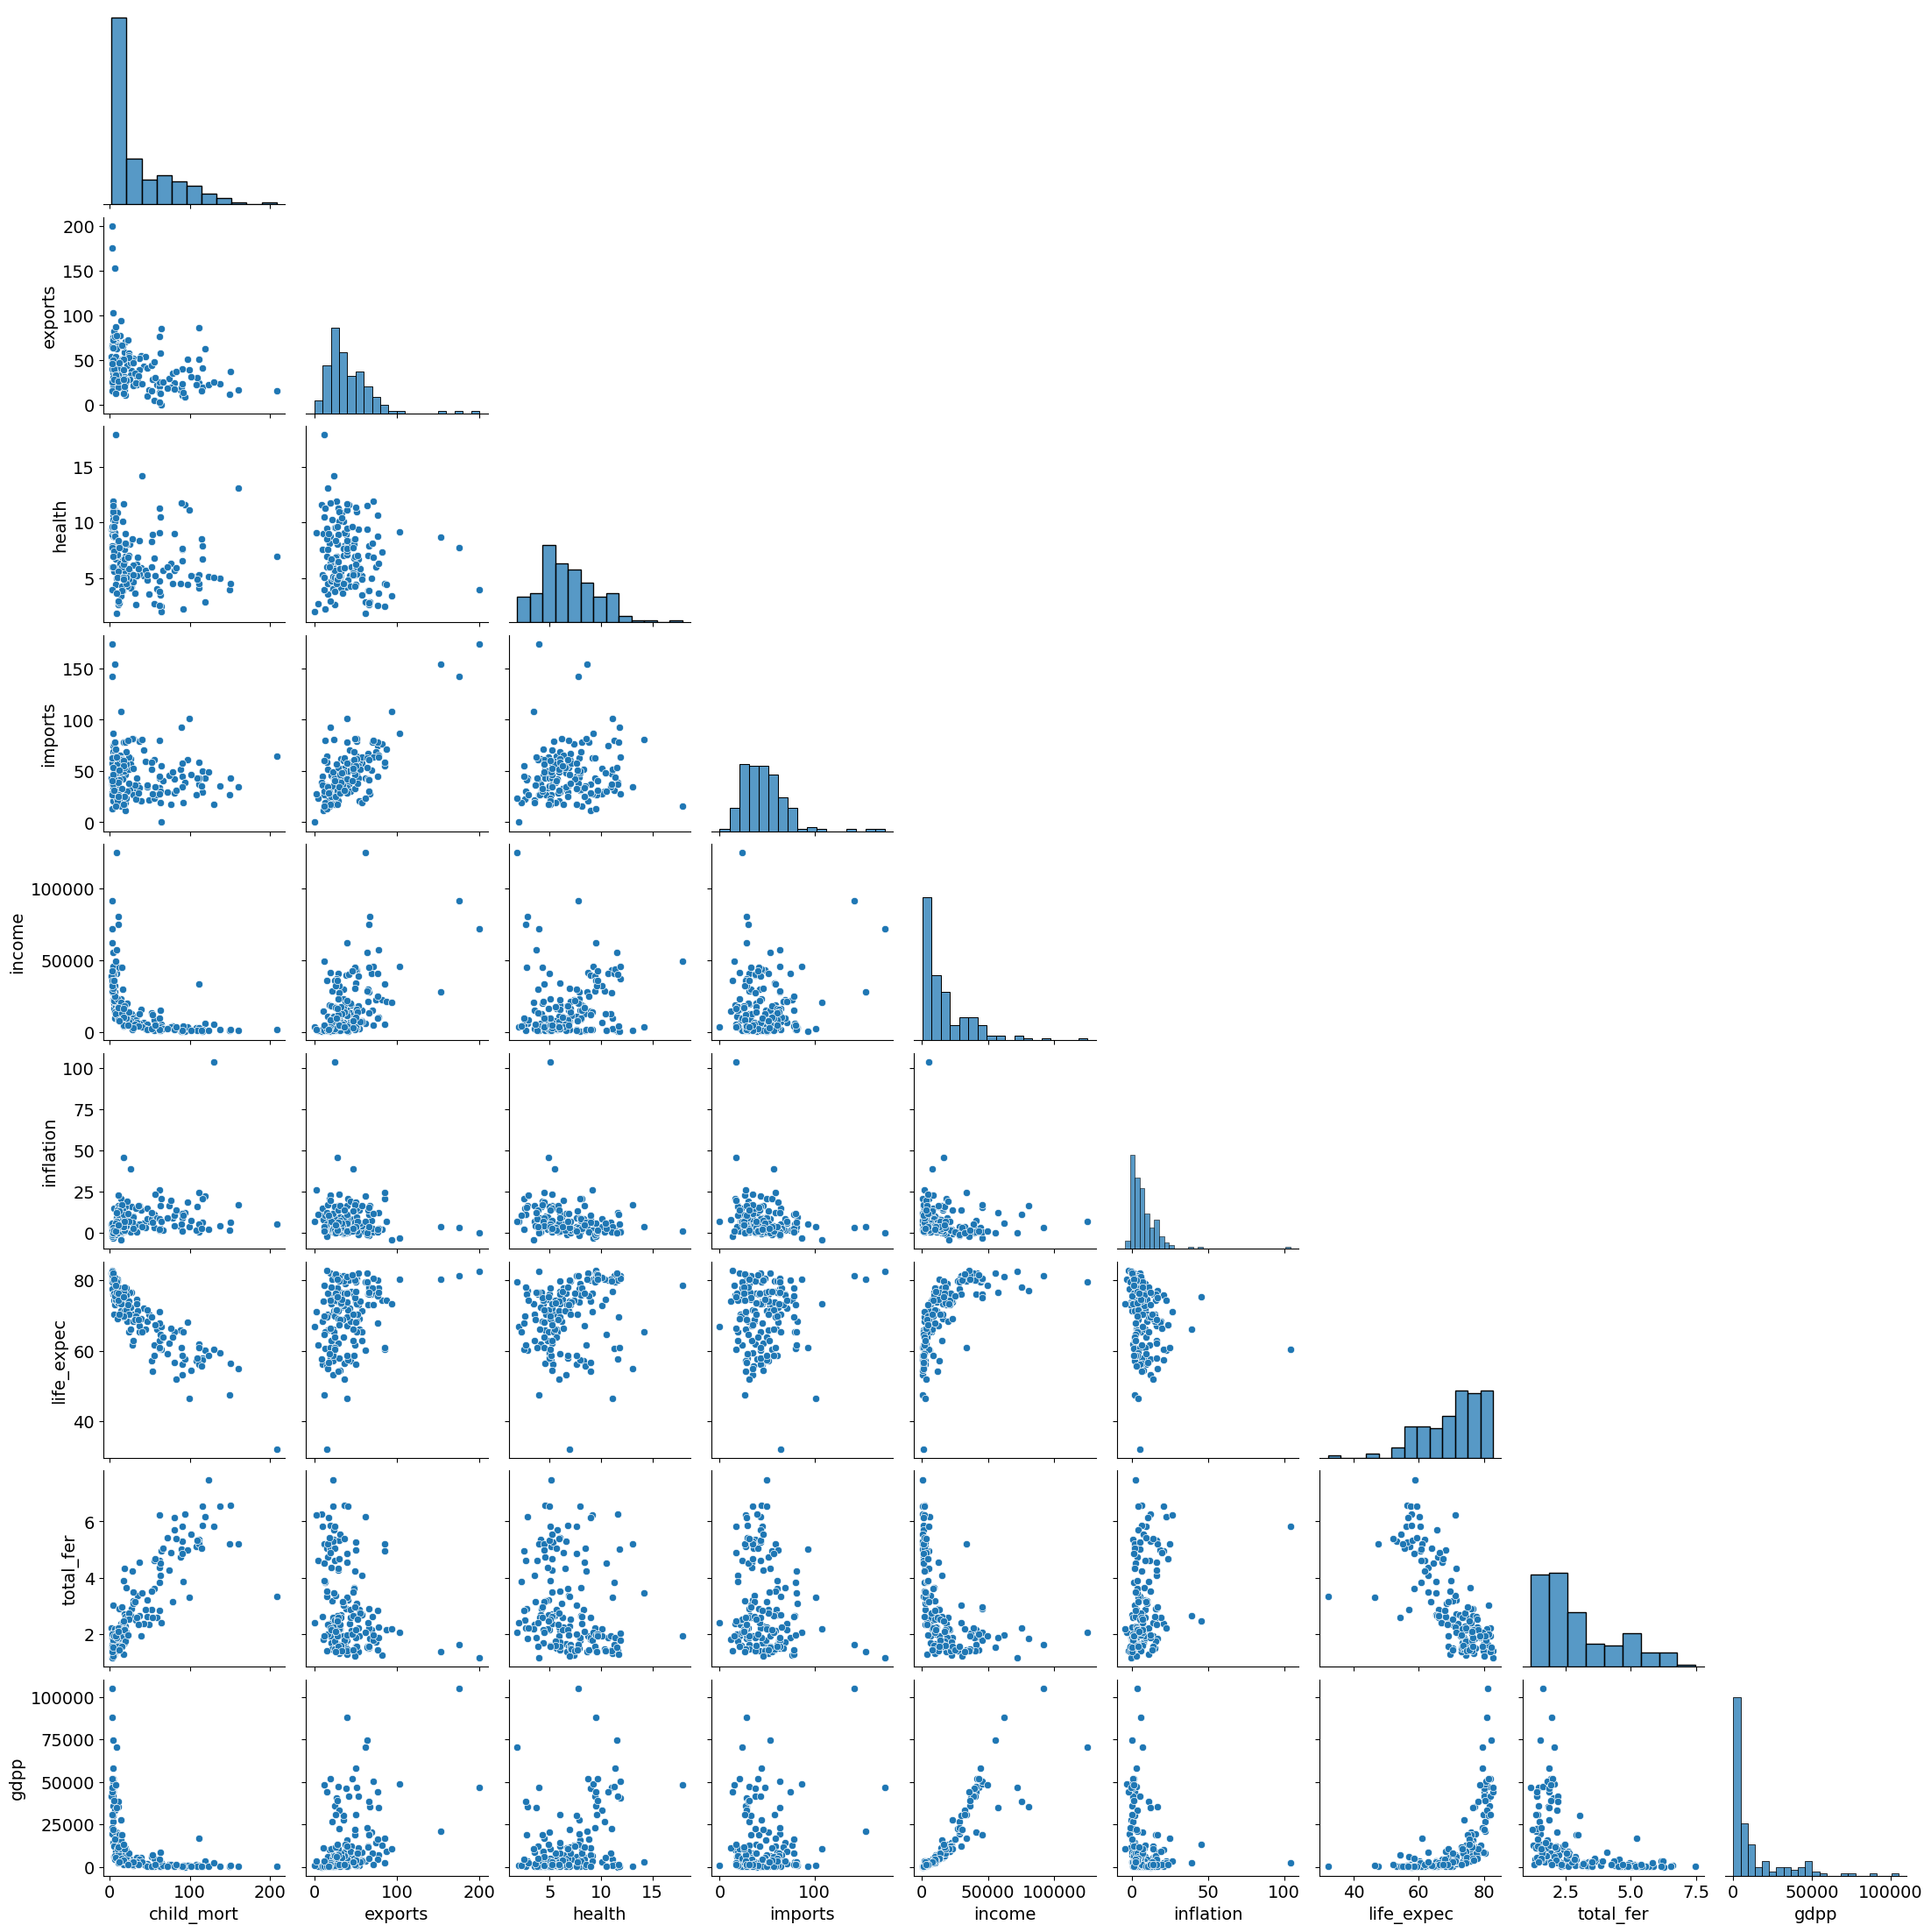

In [12]:
pairplot = sns.pairplot(df, corner=True)
plt.show(pairplot)

Besides, we can use `.heatmap()` function combined with the `.corr()` function to display the relationship between each variable in the dataset based on the correlation coefficient.

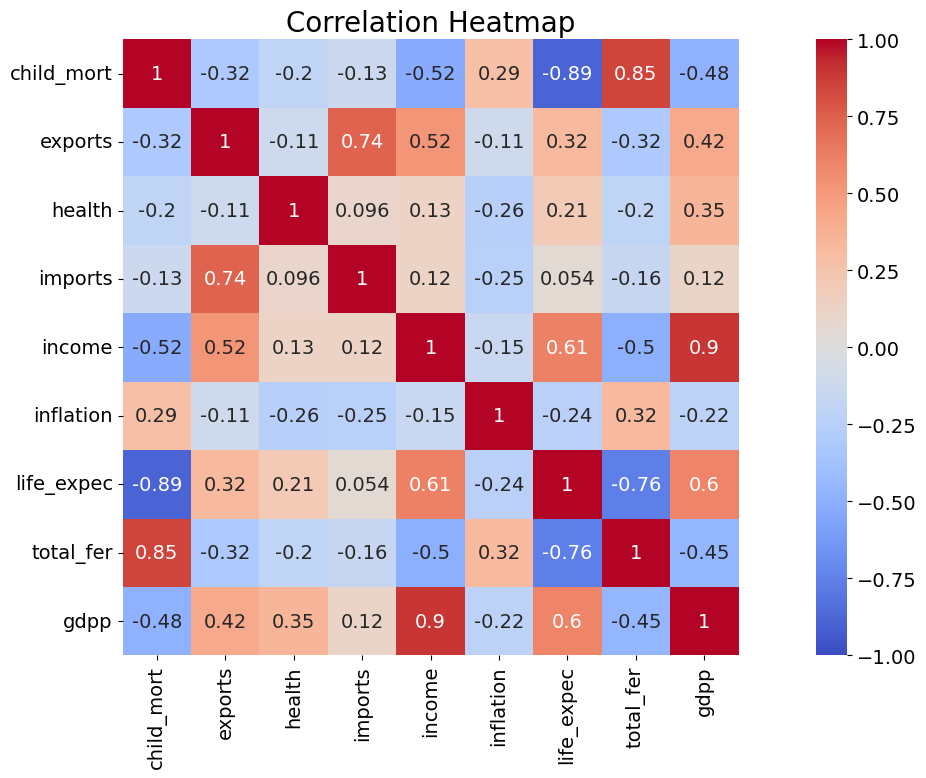

In [18]:
##correlation heatmap to check how each variable behaves with other variable and in which direction
correlation_metrics = df.iloc[:, 1:].corr()

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_metrics, square=True, annot=True, vmax=1, vmin=-1, cmap='coolwarm', annot_kws={"size": 14})
plt.title('Correlation Heatmap', size=20)
plt.savefig('heatmap.png',bbox_inches='tight')
plt.show()

In [19]:
#removing countries below median income
df_filter_income = df[df.income < df.income.median()]
df_filter_income

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [55]:
##filtering dataframe with selected features for clustering
df_cluster = df_filter_income[['country', 'income', 'child_mort','exports']].reset_index()
df_cluster.drop('index', inplace=True, axis=1)

display(df_cluster)

,country,income,child_mort,exports
0,Afghanistan,1610,90.2,10.0
1,Albania,9930,16.6,28.0
2,Angola,5900,119.0,62.3
3,Armenia,6700,18.1,20.8
4,Bangladesh,2440,49.4,16.0
...,...,...,...,...
78,Uzbekistan,4240,36.3,31.7
79,Vanuatu,2950,29.2,46.6
80,Vietnam,4490,23.3,72.0
81,Yemen,4480,56.3,30.0


In [57]:
##scaling the data set to a same unit so that features with different statistical values have same impact
sc = skp.StandardScaler()

data_scale = np.array(df_cluster[['income', 'child_mort','exports']])
scaled = sc.fit_transform(data_scale.astype(float))
scaled_df = pd.DataFrame(scaled, columns=['income', 'child_mort','exports'])

display(scaled_df)

,income,child_mort,exports
0,-0.920666,0.640089,-1.246578
1,1.977480,-1.132268,-0.167495
2,0.573691,1.333620,1.888756
3,0.852359,-1.096147,-0.599128
4,-0.631548,-0.342414,-0.886884
...,...,...,...
78,-0.004545,-0.657874,0.054316
79,-0.453897,-0.828848,0.947556
80,0.082539,-0.970926,2.470261
81,0.079055,-0.176255,-0.047597


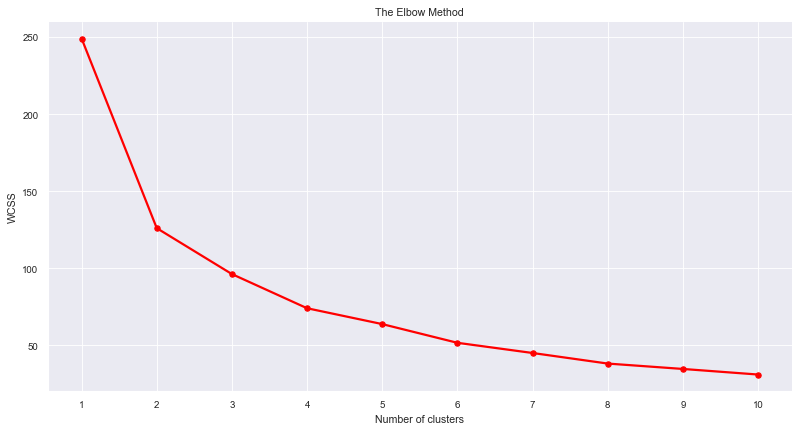

In [58]:
##implementing elbow method to identify optimal number of K clusters
wcss = []
k_range = range(1, 11)

for i in k_range:
    kmeans = skc.KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(12, 6), dpi=80)

plt.plot(k_range, wcss, marker='o', color='red', linewidth=2)

plt.xticks(k_range)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('num_clust.png')
plt.show()

In [60]:
#fitting our clustering algorithm with selected K cluster i.e. 3
kmeans_3 = skc.KMeans(n_clusters=3,random_state=42)
kmeans_3.fit(scaled_df)
kmeans_3.labels_

array([1, 0, 2, 0, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 2,
       0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1,
       2, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1])

In [151]:
df_cluster['cluster_id'] = kmeans_3.labels_
display(df_cluster)

,country,income,child_mort,exports,cluster_id
0,Afghanistan,1610,90.2,10.0,1
1,Albania,9930,16.6,28.0,0
2,Angola,5900,119.0,62.3,2
3,Armenia,6700,18.1,20.8,0
4,Bangladesh,2440,49.4,16.0,1
...,...,...,...,...,...
78,Uzbekistan,4240,36.3,31.7,0
79,Vanuatu,2950,29.2,46.6,2
80,Vietnam,4490,23.3,72.0,2
81,Yemen,4480,56.3,30.0,1


In [91]:
##aggergating cluster mean values of each feature
grouped_kmeans = df_cluster.iloc[:, 1:].groupby(['cluster_id']).mean().round(1)
grouped_kmeans.reset_index(inplace=True)
grouped_kmeans

,cluster_id,income,child_mort,exports
0,0,7646.8,22.2,30.0
1,1,2108.0,91.1,21.1
2,2,5229.4,48.6,55.1


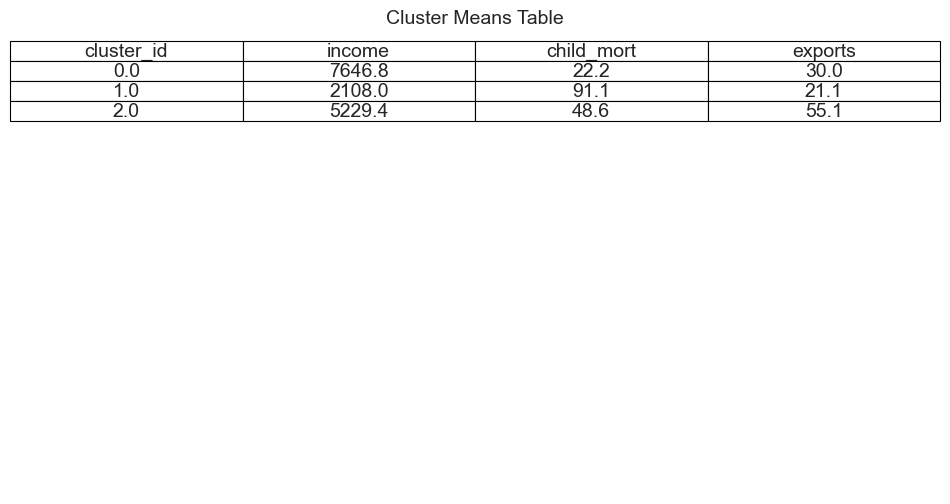

In [105]:
##table 
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

table = ax.table(cellText=grouped_kmeans.values, colLabels=grouped_kmeans.columns, cellLoc='center', loc='upper center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.2, 1.2)
plt.title('Cluster Means Table',fontsize=14)

fig.savefig('table_plot.png', bbox_inches='tight', pad_inches=0.1)

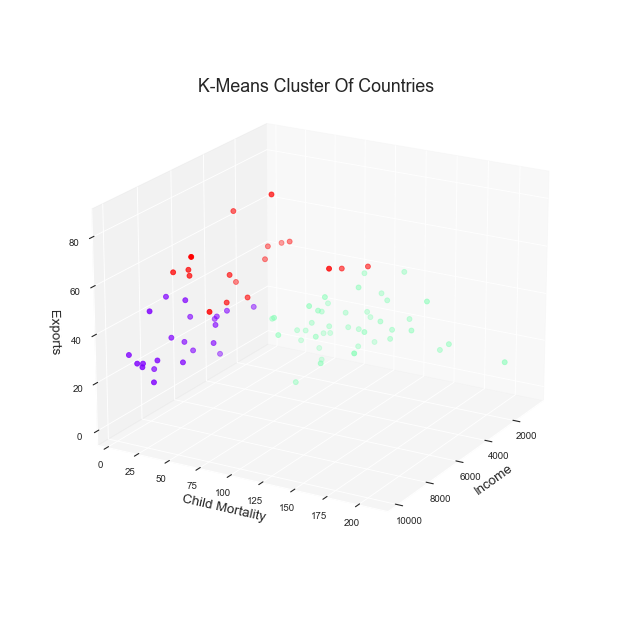

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##3d plot of clustering result for better visualization
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='none', edgecolor='none')
ax = fig.add_subplot(111, projection='3d', facecolor='none')

scatter = ax.scatter3D(df_cluster['income'], df_cluster['child_mort'], df_cluster['exports'], c=kmeans_labels, cmap='rainbow')


xLabel = ax.set_xlabel('Income', linespacing=3.2,fontsize=12)
yLabel = ax.set_ylabel('Child Mortality', linespacing=3.1,fontsize=12)
zLabel = ax.set_zlabel('Exports', linespacing=3.4,fontsize=12)
ax.set_title('K-Means Cluster Of Countries', pad=20,y=0.9,fontsize=16)

ax.view_init(elev=20, azim=30)
ax.dist=12
plt.savefig('3d cluster.png',bbox_inches='tight')

plt.show()

In [136]:

##fitting algorithm
X = df[['total_fer', 'inflation', 'health', 'exports','child_mort']]
y = df['gdpp']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
model_ridge.fit(X_train_scaled, y_train)


y_pred_ridge = model_ridge.predict(X_test_scaled)


mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge):", mse_ridge)
print("R-squared (Ridge):", r2_ridge)


Mean Squared Error (Ridge): 166170976.97111565
R-squared (Ridge): 0.2242091697211186


In [141]:
##calculating p-value
n = len(y_test)
p = X_test_scaled.shape[1]
df_reg = p - 1
df_res = n - p - 1
msr = mean_squared_error(y_test, y_pred_ridge) * p
mse = mean_squared_error(y_test, y_pred_ridge)
f_statistic = msr / mse
p_value = 1 - f.cdf(f_statistic, df_reg, df_res)
print(f"P-value: {p_value}")

P-value: 0.003609671843736062


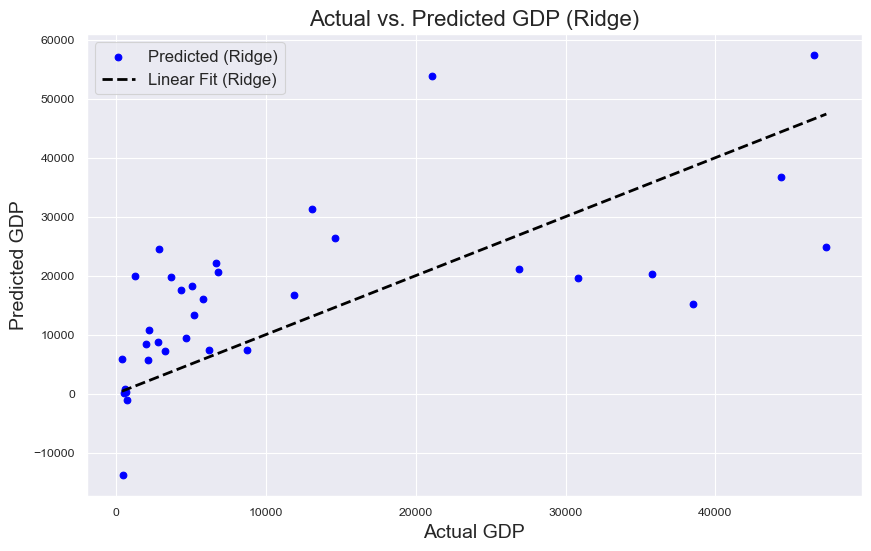

In [145]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predicted (Ridge)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Linear Fit (Ridge)')
plt.xlabel('Actual GDP', fontsize=14)
plt.ylabel('Predicted GDP', fontsize=14)
plt.title('Actual vs. Predicted GDP (Ridge)', fontsize=16)
plt.legend(fontsize=12)
plt.savefig('fit.png',bbox_inches='tight')
plt.show()